## Understanding data

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import requests
url = 'https://raw.githubusercontent.com/vanshu25/Breast-Cancer-Predictor/master/Breast%20Cancer%20Data.csv'
res = requests.get(url, allow_redirects=True)
with open('breast_cancer.csv','wb') as file:
    file.write(res.content)
df = pd.read_csv('breast_cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#let's check for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Pre-processing data

In [7]:
#Our main purpose is to classify whether it is Malignant=M or Benign=B..so let's convert M and into 1 and 0
df['diagnosis'].replace({'M':1,'B':0},inplace=True)

In [8]:
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


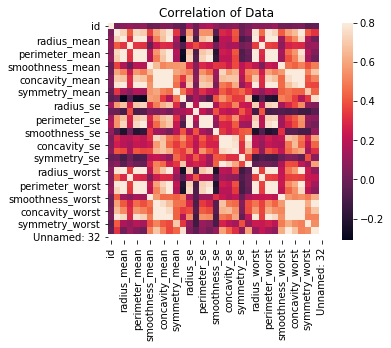

In [9]:
data_corr = df.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Data")
plt.show()

In [10]:
#let's see correlation of data
data_corr['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

In [11]:
#we cans ee that 'unnamed' is not contributing to the classification,so we will drop this column
X = df.drop(['Unnamed: 32','id','diagnosis'],axis=1)
Y = df['diagnosis'].to_numpy()

In [12]:
#splitting data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

## Standardization 

In [13]:
#let's perfrom standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating the model

In [14]:
# create the model
model = torch.nn.Linear(X_train.shape[1], 1)

In [15]:
# load sets in format compatible with pytorch
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

In [16]:
X_train #our data is in this form now

tensor([[-1.1871, -0.4068, -1.1644,  ..., -0.7716, -0.0448, -0.4431],
        [-0.7875, -1.9418, -0.7841,  ..., -0.3976,  0.1479,  0.0139],
        [-0.8345, -1.0359, -0.8675,  ..., -1.5065, -0.1695, -0.5739],
        ...,
        [ 3.0973,  0.5243,  3.1417,  ...,  2.0041,  0.3706,  0.6246],
        [ 0.2586,  0.1034,  0.1599,  ..., -0.8849, -0.4364, -1.2830],
        [-0.5230, -0.6378, -0.5349,  ..., -0.4430, -0.4806, -0.4723]])

In [17]:
y_train = torch.from_numpy(y_train).float().reshape(-1, 1)
y_test = torch.from_numpy(y_test).float().reshape(-1, 1)

In [18]:
#Let's specify hyperparameters and iterate through train data to run the model
def Loss_function():
    return torch.nn.BCEWithLogitsLoss()

In [19]:
#for gradient descent
def optimizer(model):
    return torch.optim.Adam(model.parameters(), lr = 0.0007)

In [20]:
criterion = Loss_function()
Optimizer = optimizer(model)

## Running the model

In [21]:
# run the model
epochs = 2000
# initialise the train_loss & test_losses which will be updated
train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)

for epoch in range(epochs): 
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    # clear old gradients from the last step
    Optimizer.zero_grad()
    # compute the gradients necessary to adjust the weights
    loss.backward()
     # update the weights of the neural network
    Optimizer.step()

    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    train_losses[epoch] = loss.item()
    test_losses[epoch] = loss_test.item()

    if (epoch + 1) % 50 == 0:
        print (str('Epoch ') + str((epoch+1)) + str('/') + str(epochs) + str(',  training loss = ') + str((loss.item())) + str(', test loss = ') + str(loss_test.item()))

Epoch 50/2000,  training loss = 0.5806806683540344, test loss = 0.5864638686180115
Epoch 100/2000,  training loss = 0.45086684823036194, test loss = 0.4542354643344879
Epoch 150/2000,  training loss = 0.3726280629634857, test loss = 0.37490129470825195
Epoch 200/2000,  training loss = 0.32000118494033813, test loss = 0.32247158885002136
Epoch 250/2000,  training loss = 0.28185176849365234, test loss = 0.284818559885025
Epoch 300/2000,  training loss = 0.25275203585624695, test loss = 0.25612977147102356
Epoch 350/2000,  training loss = 0.2297399640083313, test loss = 0.23341438174247742
Epoch 400/2000,  training loss = 0.2110498547554016, test loss = 0.21499888598918915
Epoch 450/2000,  training loss = 0.1955542415380478, test loss = 0.19986160099506378
Epoch 500/2000,  training loss = 0.18249425292015076, test loss = 0.1873163878917694
Epoch 550/2000,  training loss = 0.17133775353431702, test loss = 0.17685480415821075
Epoch 600/2000,  training loss = 0.16169872879981995, test loss =

## Evaluating the model

Text(0.5, 1.0, 'Model Loss')

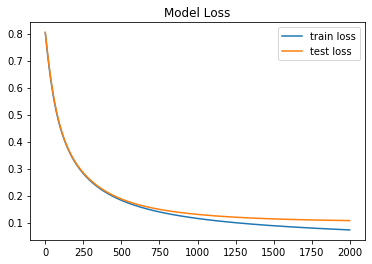

In [22]:
# visualise the test and train loss
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.title('Model Loss')

In [23]:
with torch.no_grad():
    output_train = model(X_train)
    output_train = (output_train.numpy() > 0)

    train_acc = np.mean(y_train.numpy() == output_train)

    output_test = model(X_test)
    output_test = (output_test.numpy() > 0)
  
    test_acc = np.mean(y_test.numpy() == output_test)

In [24]:
print ('Train accuracy is: ' + str(train_acc))

Train accuracy is: 0.9849246231155779


In [25]:
print ('Test accuracy is: ' + str(test_acc))

Test accuracy is: 0.9766081871345029
